# HR Employee Attrition Analysis
## Data source: Kaggle

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# Load the dataset
df = pd.read_csv("C:\\Users\\okead\\Downloads\\HR-Employee-Attrition.csv")
# Display the first few rows of the dataframe to understand its structure
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# Check for missing values and duplicates
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

# Check data types
data_types = df.dtypes

# Display the results
print('Missing Values:', missing_values)
print('Duplicates:', duplicates)
print('Data Types:', data_types)

Missing Values: Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole      

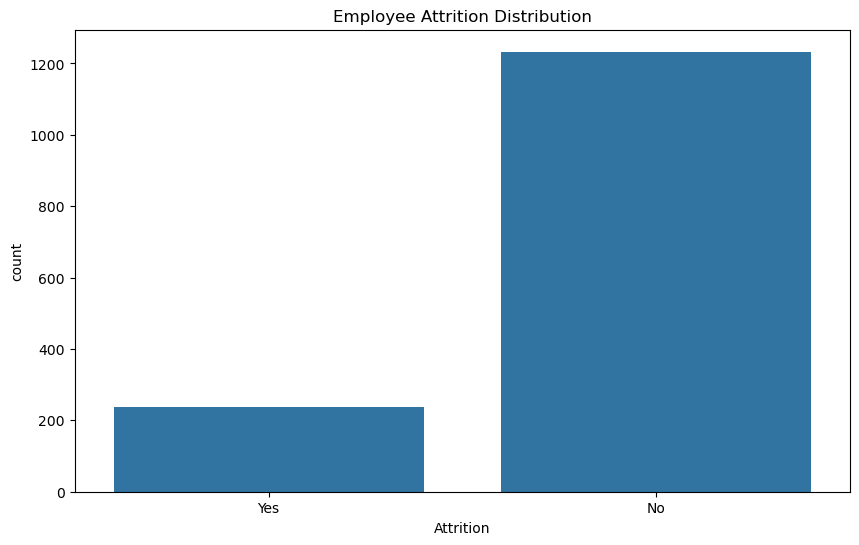

Overall Attrition Rate (%):
Attrition
No     83.88
Yes    16.12
Name: proportion, dtype: float64
Department-wise Attrition Rate (%):
Department
Human Resources           19.05
Research & Development    13.84
Sales                     20.63
Name: Yes, dtype: float64


In [8]:
# Calculate attrition rate
attrition_rate = (df['Attrition'].value_counts(normalize=True) * 100).round(2)

# Create attrition visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition')
plt.title('Employee Attrition Distribution')
plt.show()

# Department-wise attrition
dept_attrition = df.groupby(['Department', 'Attrition']).size().unstack()
dept_attrition_pct = (dept_attrition.div(dept_attrition.sum(axis=1), axis=0) * 100).round(2)

print('\
Overall Attrition Rate (%):')
print(attrition_rate)

print('\
Department-wise Attrition Rate (%):')
print(dept_attrition_pct['Yes'])

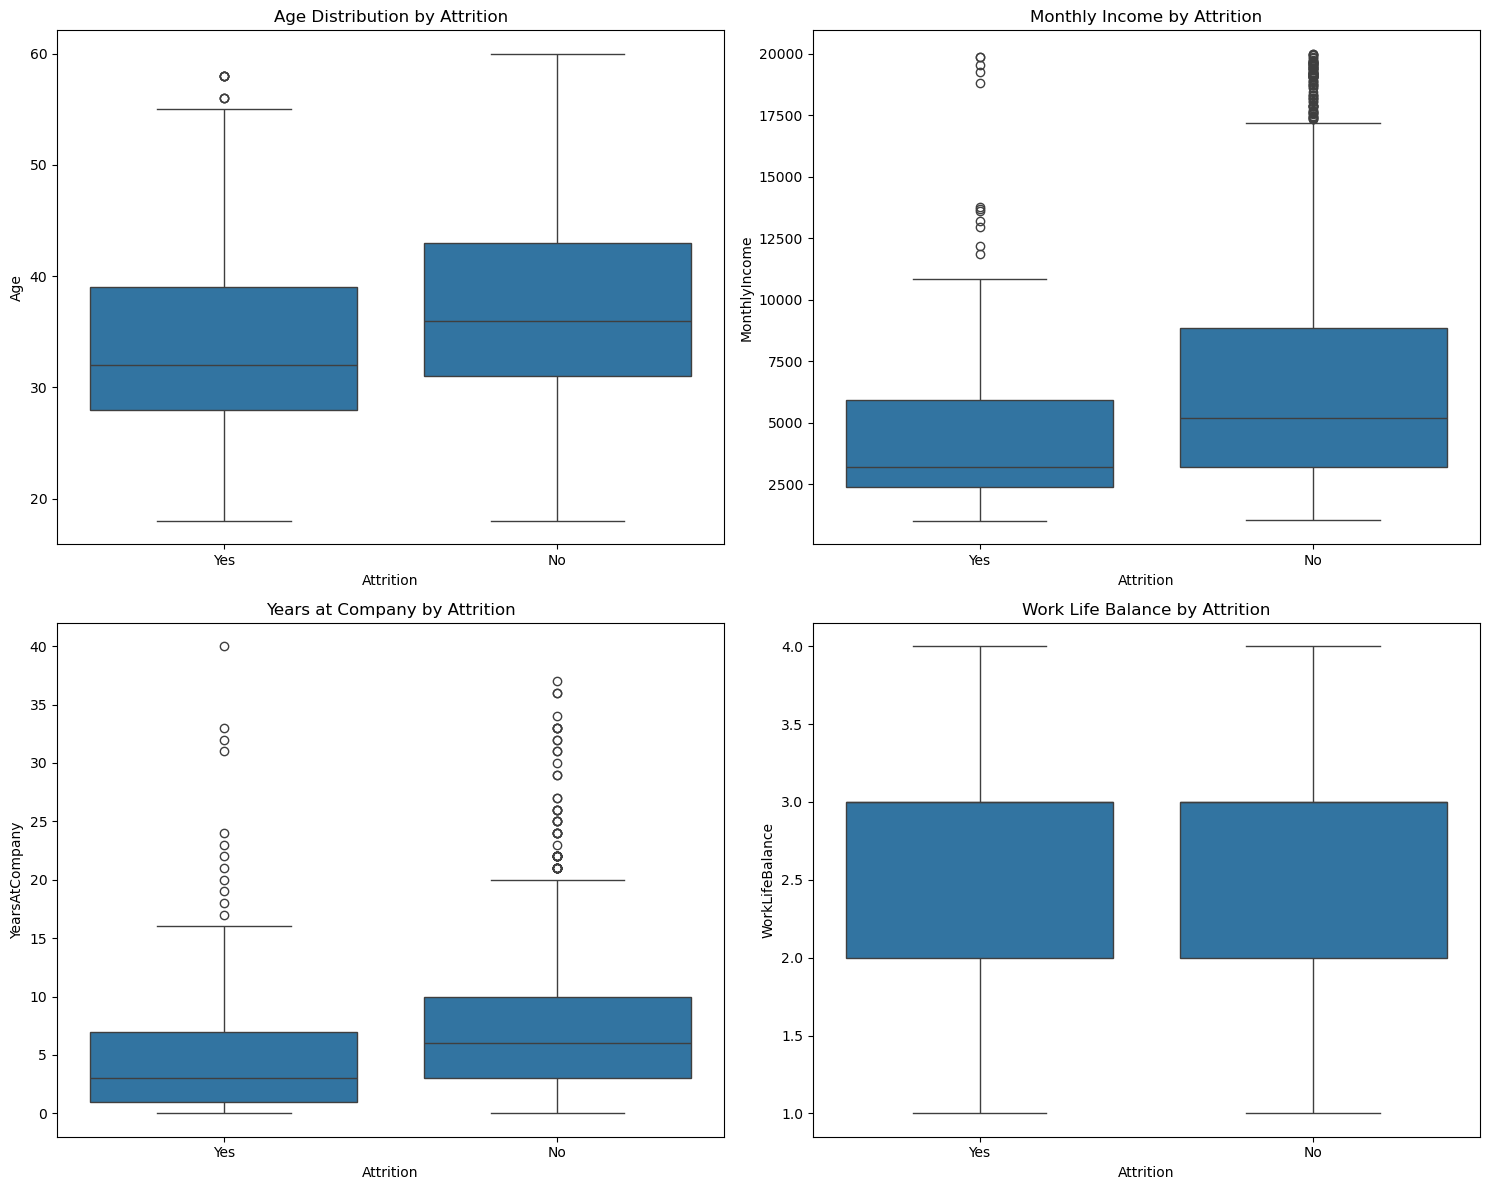

Average metrics by Attrition:
             Age  MonthlyIncome  YearsAtCompany  WorkLifeBalance
Attrition                                                       
No         37.56        6832.74            7.37             2.78
Yes        33.61        4787.09            5.13             2.66


In [9]:
# Create subplots for key metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age distribution by attrition
sns.boxplot(data=df, x='Attrition', y='Age', ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Attrition')

# Monthly Income by attrition
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', ax=axes[0,1])
axes[0,1].set_title('Monthly Income by Attrition')

# Years at Company by attrition
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany', ax=axes[1,0])
axes[1,0].set_title('Years at Company by Attrition')

# Work Life Balance by attrition
sns.boxplot(data=df, x='Attrition', y='WorkLifeBalance', ax=axes[1,1])
axes[1,1].set_title('Work Life Balance by Attrition')

plt.tight_layout()
plt.show()

# Calculate average values for these metrics
metrics = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'WorkLifeBalance']
summary = df.groupby('Attrition')[metrics].mean().round(2)
print('\
Average metrics by Attrition:')
print(summary)

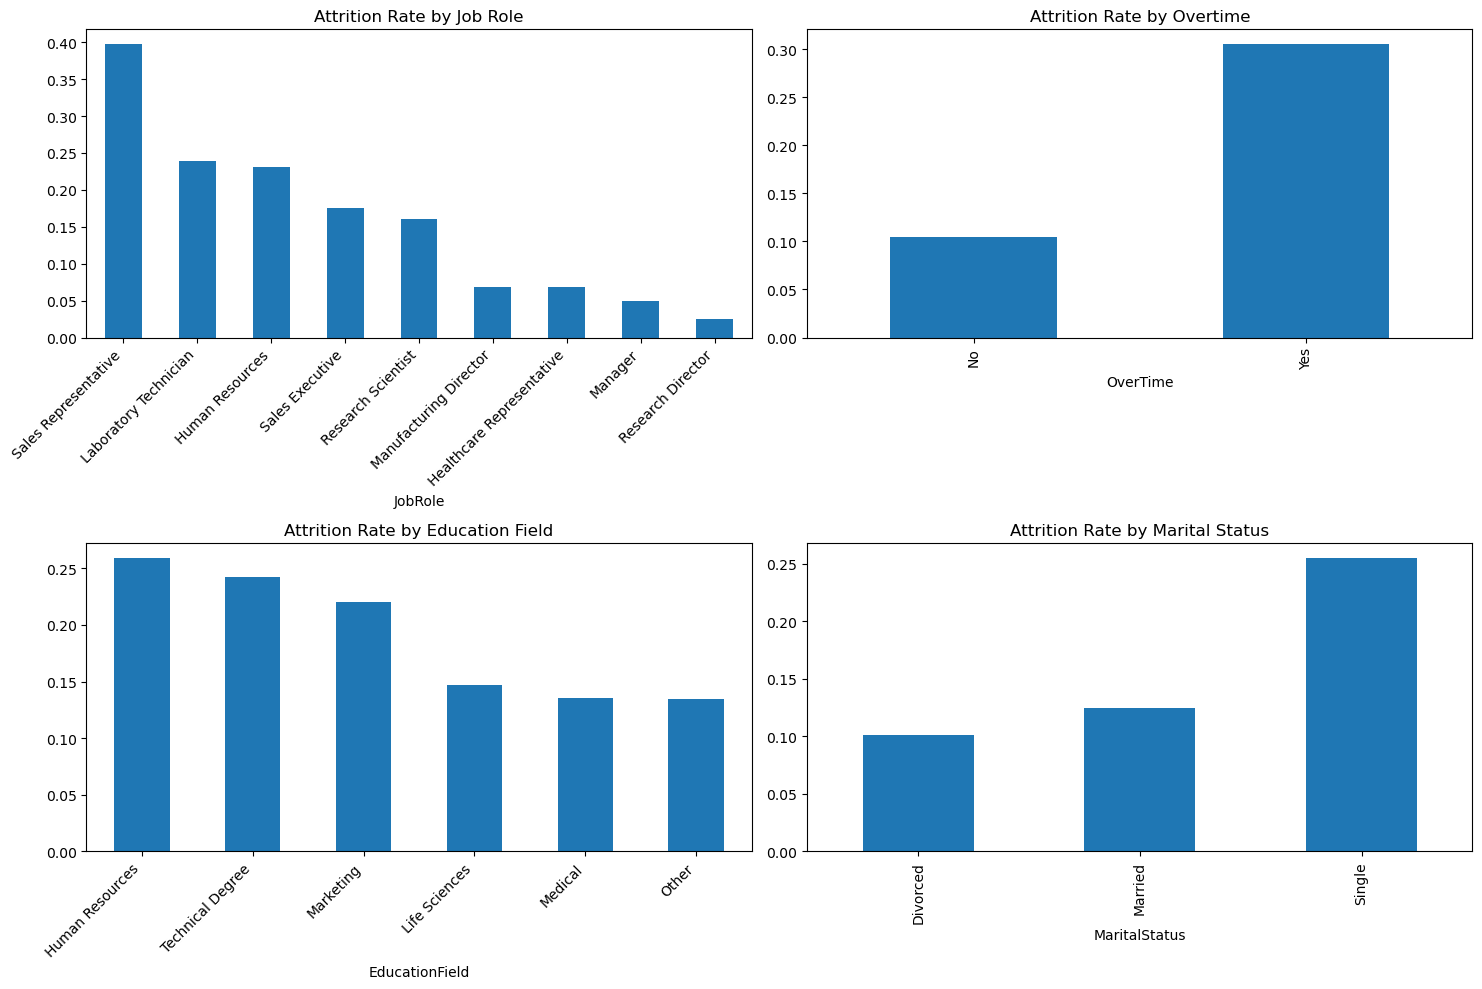

Key factors affecting attrition:
Job Role with highest attrition rate: Sales Representative
Overtime impact: Yes shows higher attrition
Education Field with highest attrition: Human Resources
Marital Status with highest attrition: Single


In [7]:
# Create visualizations for key factors
plt.figure(figsize=(15, 10))

# Plot 1: Job Role and Attrition
plt.subplot(2, 2, 1)
job_attrition = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack()
job_attrition['Yes'].sort_values(ascending=False).plot(kind='bar')
plt.title('Attrition Rate by Job Role')
plt.xticks(rotation=45, ha='right')

# Plot 2: Overtime and Attrition
plt.subplot(2, 2, 2)
overtime_attrition = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack()
overtime_attrition['Yes'].plot(kind='bar')
plt.title('Attrition Rate by Overtime')

# Plot 3: Education Field and Attrition
plt.subplot(2, 2, 3)
edu_attrition = df.groupby('EducationField')['Attrition'].value_counts(normalize=True).unstack()
edu_attrition['Yes'].sort_values(ascending=False).plot(kind='bar')
plt.title('Attrition Rate by Education Field')
plt.xticks(rotation=45, ha='right')

# Plot 4: MaritalStatus and Attrition
plt.subplot(2, 2, 4)
marital_attrition = df.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).unstack()
marital_attrition['Yes'].plot(kind='bar')
plt.title('Attrition Rate by Marital Status')

plt.tight_layout()
plt.show()

# Print key insights
print("\
Key factors affecting attrition:")
print("\
Job Role with highest attrition rate:", 
      job_attrition['Yes'].sort_values(ascending=False).index[0])
print("Overtime impact:", 
      overtime_attrition['Yes'].sort_values(ascending=False).index[0], "shows higher attrition")
print("Education Field with highest attrition:", 
      edu_attrition['Yes'].sort_values(ascending=False).index[0])
print("Marital Status with highest attrition:", 
      marital_attrition['Yes'].sort_values(ascending=False).index[0])

###
Based on the analysis, the key factors affecting employee attrition include job role, overtime, education field, and marital status. Employees in sales roles, those working overtime, individuals in human resources, and single employees show higher attrition rates.

Recommendations:

Targeted Retention Programs: Develop specific retention strategies for high-risk groups, such as sales representatives and single employees, to address their unique needs and challenges.

Work-Life Balance Initiatives: Implement policies to manage overtime effectively, ensuring employees have a balanced work-life environment.

Career Development Opportunities: Offer career advancement and development programs, especially for employees in roles and fields with higher attrition rates, to increase job satisfaction and retention.

Employee Engagement: Conduct regular surveys and feedback sessions to understand employee concerns and improve engagement, particularly in departments with higher attrition rates.

By focusing on these areas, HR can work towards reducing attrition and improving overall employee satisfaction and retention.

